<a href="https://colab.research.google.com/github/Syleshkumar1996/New-york-citi-bike-sales-prediction/blob/main/EDA_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the prepared dataset
df=pd.read_csv('Data.csv')
df

,Tripdate,Triphour,Temp,Relativehumidity,Dewpoint,Precipitation,Rain,Snowfall,Windspeed,Windgusts,Subscriber,Customer,Total
0,01-01-2014,0,-4.0,43,-14.8,0.0,0.0,0.0,14.1,29.500000,97,18,115
1,01-01-2014,1,-4.4,45,-14.5,0.0,0.0,0.0,11.9,27.700001,178,26,204
2,01-01-2014,2,-4.6,46,-14.5,0.0,0.0,0.0,10.8,24.799999,152,9,161
3,01-01-2014,3,-4.7,46,-14.5,0.0,0.0,0.0,10.9,22.700001,127,17,144
4,01-01-2014,4,-4.9,47,-14.5,0.0,0.0,0.0,10.5,22.700001,59,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,31-12-2014,19,-3.4,51,-12.2,0.0,0.0,0.0,9.2,25.200001,271,14,285
8754,31-12-2014,20,-3.7,52,-12.1,0.0,0.0,0.0,10.2,25.900000,191,7,198
8755,31-12-2014,21,-3.7,52,-12.1,0.0,0.0,0.0,10.7,26.299999,151,8,159
8756,31-12-2014,22,-3.7,51,-12.3,0.0,0.0,0.0,11.3,27.400000,127,46,173


In [ ]:
#Checking the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tripdate          8758 non-null   object 
 1   Triphour          8758 non-null   int64  
 2   Temp              8758 non-null   float64
 3   Relativehumidity  8758 non-null   int64  
 4   Dewpoint          8758 non-null   float64
 5   Precipitation     8758 non-null   float64
 6   Rain              8758 non-null   float64
 7   Snowfall          8758 non-null   float64
 8   Windspeed         8758 non-null   float64
 9   Windgusts         8758 non-null   float64
 10  Subscriber        8758 non-null   int64  
 11  Customer          8758 non-null   int64  
 12  Total             8758 non-null   int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 889.6+ KB


In [ ]:
#Converting the datatype of "Tripdate" to datetime
df['Tripdate']=pd.to_datetime(df['Tripdate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tripdate          8758 non-null   datetime64[ns]
 1   Triphour          8758 non-null   int64         
 2   Temp              8758 non-null   float64       
 3   Relativehumidity  8758 non-null   int64         
 4   Dewpoint          8758 non-null   float64       
 5   Precipitation     8758 non-null   float64       
 6   Rain              8758 non-null   float64       
 7   Snowfall          8758 non-null   float64       
 8   Windspeed         8758 non-null   float64       
 9   Windgusts         8758 non-null   float64       
 10  Subscriber        8758 non-null   int64         
 11  Customer          8758 non-null   int64         
 12  Total             8758 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 889.6 KB


In [ ]:
#Creating new column: Month
df['Month']=df['Tripdate'].dt.month
df

,Tripdate,Triphour,Temp,Relativehumidity,Dewpoint,Precipitation,Rain,Snowfall,Windspeed,Windgusts,Subscriber,Customer,Total,Month
0,2014-01-01,0,-4.0,43,-14.8,0.0,0.0,0.0,14.1,29.500000,97,18,115,1
1,2014-01-01,1,-4.4,45,-14.5,0.0,0.0,0.0,11.9,27.700001,178,26,204,1
2,2014-01-01,2,-4.6,46,-14.5,0.0,0.0,0.0,10.8,24.799999,152,9,161,1
3,2014-01-01,3,-4.7,46,-14.5,0.0,0.0,0.0,10.9,22.700001,127,17,144,1
4,2014-01-01,4,-4.9,47,-14.5,0.0,0.0,0.0,10.5,22.700001,59,2,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2014-12-31,19,-3.4,51,-12.2,0.0,0.0,0.0,9.2,25.200001,271,14,285,12
8754,2014-12-31,20,-3.7,52,-12.1,0.0,0.0,0.0,10.2,25.900000,191,7,198,12
8755,2014-12-31,21,-3.7,52,-12.1,0.0,0.0,0.0,10.7,26.299999,151,8,159,12
8756,2014-12-31,22,-3.7,51,-12.3,0.0,0.0,0.0,11.3,27.400000,127,46,173,12


In [ ]:
#Creating new column: day of the week
df['Weekday']=df['Tripdate'].dt.weekday
df

,Tripdate,Triphour,Temp,Relativehumidity,Dewpoint,Precipitation,Rain,Snowfall,Windspeed,Windgusts,Subscriber,Customer,Total,Month,Weekday
0,2014-01-01,0,-4.0,43,-14.8,0.0,0.0,0.0,14.1,29.500000,97,18,115,1,2
1,2014-01-01,1,-4.4,45,-14.5,0.0,0.0,0.0,11.9,27.700001,178,26,204,1,2
2,2014-01-01,2,-4.6,46,-14.5,0.0,0.0,0.0,10.8,24.799999,152,9,161,1,2
3,2014-01-01,3,-4.7,46,-14.5,0.0,0.0,0.0,10.9,22.700001,127,17,144,1,2
4,2014-01-01,4,-4.9,47,-14.5,0.0,0.0,0.0,10.5,22.700001,59,2,61,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2014-12-31,19,-3.4,51,-12.2,0.0,0.0,0.0,9.2,25.200001,271,14,285,12,2
8754,2014-12-31,20,-3.7,52,-12.1,0.0,0.0,0.0,10.2,25.900000,191,7,198,12,2
8755,2014-12-31,21,-3.7,52,-12.1,0.0,0.0,0.0,10.7,26.299999,151,8,159,12,2
8756,2014-12-31,22,-3.7,51,-12.3,0.0,0.0,0.0,11.3,27.400000,127,46,173,12,2


In [ ]:
#Creating new column:Season
df['Season']=np.nan
for i in df.index:
 if df.iat[i,13]==12 or df.iat[i,13]==1 or df.iat[i,13]==2: 
  df.iat[i,15]="Winter"
 if df.iat[i,13]==3 or df.iat[i,13]==4 or df.iat[i,13]==5: 
  df.iat[i,15]="Spring"
 if df.iat[i,13]==6 or df.iat[i,13]==7 or df.iat[i,13]==8: 
  df.iat[i,15]="Summer"
 if df.iat[i,13]==9 or df.iat[i,13]==10 or df.iat[i,13]==11: 
  df.iat[i,15]="Fall"
df

,Tripdate,Triphour,Temp,Relativehumidity,Dewpoint,Precipitation,Rain,Snowfall,Windspeed,Windgusts,Subscriber,Customer,Total,Month,Weekday,Season
0,2014-01-01,0,-4.0,43,-14.8,0.0,0.0,0.0,14.1,29.500000,97,18,115,1,2,Winter
1,2014-01-01,1,-4.4,45,-14.5,0.0,0.0,0.0,11.9,27.700001,178,26,204,1,2,Winter
2,2014-01-01,2,-4.6,46,-14.5,0.0,0.0,0.0,10.8,24.799999,152,9,161,1,2,Winter
3,2014-01-01,3,-4.7,46,-14.5,0.0,0.0,0.0,10.9,22.700001,127,17,144,1,2,Winter
4,2014-01-01,4,-4.9,47,-14.5,0.0,0.0,0.0,10.5,22.700001,59,2,61,1,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2014-12-31,19,-3.4,51,-12.2,0.0,0.0,0.0,9.2,25.200001,271,14,285,12,2,Winter
8754,2014-12-31,20,-3.7,52,-12.1,0.0,0.0,0.0,10.2,25.900000,191,7,198,12,2,Winter
8755,2014-12-31,21,-3.7,52,-12.1,0.0,0.0,0.0,10.7,26.299999,151,8,159,12,2,Winter
8756,2014-12-31,22,-3.7,51,-12.3,0.0,0.0,0.0,11.3,27.400000,127,46,173,12,2,Winter


In [ ]:
#Triphour vs Sales
df_hour=df.groupby('Triphour').agg({'Total':sum,'Total':sum,'Customer':sum,'Subscriber':sum}).reset_index()
fig_hour = px.bar(df_hour,
                     x="Triphour", y="Total",
                     template="plotly_white", title="Hourly Total Sales",labels={"Triphour":"Hour","Total":"Sales"},width=1000, height=300)
fig_hour_s = px.bar(df_hour,
                     x="Triphour", y="Subscriber",
                     template="plotly_white", title="Hourly Subscriber Sales",labels={"Triphour":"Hour","Subscriber":"Subscriber Sales"},width=1000, height=300)
fig_hour_c = px.bar(df_hour,
                     x="Triphour", y="Customer",
                     template="plotly_white", title="Hourly Customer Sales",labels={"Triphour":"Hour","Customer":"Customer Sales"},width=1000, height=300)
fig_hour.show()
fig_hour_s.show()
fig_hour_c.show()

In [ ]:
#Triphour vs Sales
df_month=df.groupby('Month').agg({'Total':sum,'Subscriber':sum,'Customer':sum}).reset_index()
fig_month = px.bar(df_month,
                     x="Month", y="Total",
                     template="plotly_white", title="Monthly Total Sales",labels={"Month":"Month","Total":"Sales"},width=1000, height=300)
fig_month_s = px.bar(df_month,
                     x="Month", y="Subscriber",
                     template="plotly_white", title="Monthly Subscriber Sales",labels={"Month":"Month","Subscriber":"Subscriber Sales"},width=1000, height=300)
fig_month_c = px.bar(df_month,
                     x="Month", y="Customer",
                     template="plotly_white", title="Monthly Customer Sales",labels={"Month":"Month","Customer":"Customer Sales"},width=1000, height=300)

fig_month.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [1,2,3,4,5,6,7,8,9,10,11,12],ticktext  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig_month_s.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [1,2,3,4,5,6,7,8,9,10,11,12],ticktext  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig_month_c.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [1,2,3,4,5,6,7,8,9,10,11,12],ticktext  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig_month.show()
fig_month_s.show()
fig_month_c.show()

In [ ]:
#Weekday vs Sales
df_Weekday=df.groupby('Weekday').agg({'Total':sum,'Subscriber':sum,'Customer':sum}).reset_index()
fig_Weekday = px.bar(df_Weekday,
                     x="Weekday", y="Total",
                     template="plotly_white", title="Total Sales",labels={"Weekday":"Weekday","Total":"Sales"},width=1000, height=300)
fig_Weekday_s = px.bar(df_Weekday,
                     x="Weekday", y="Subscriber",
                     template="plotly_white", title="Subscriber Sales",labels={"Weekday":"Weekday","Subscriber":"Subscriber Sales"},width=1000, height=300)
fig_Weekday_c = px.bar(df_Weekday,
                     x="Weekday", y="Customer",
                     template="plotly_white", title="Customer Sales",labels={"Weekday":"Weekday","Customer":"Customer Sales"},width=1000, height=300)

fig_Weekday.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [0,1,2,3,4,5,6],ticktext  = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))
fig_Weekday_s.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [0,1,2,3,4,5,6],ticktext  = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))
fig_Weekday_c.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [0,1,2,3,4,5,6],ticktext  = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))
fig_Weekday.show()
fig_Weekday_s.show()
fig_Weekday_c.show()

In [ ]:
#Season vs Sales
df_Season=df.groupby('Season').agg({'Total':sum,'Subscriber':sum,'Customer':sum}).reset_index()
fig_Season = px.bar(df_Season,
                     x="Season", y="Total",
                     template="plotly_white", title="Total Sales",labels={"Season":"Season","Total":"Sales"},width=1000, height=300)
fig_Season_s = px.bar(df_Season,
                     x="Season", y="Subscriber",
                     template="plotly_white", title="Subscriber Sales",labels={"Season":"Season","Subscriber":"Subscriber Sales"},width=1000, height=300)
fig_Season_c = px.bar(df_Season,
                     x="Season", y="Customer",
                     template="plotly_white", title="Customer Sales",labels={"Season":"Season","Customer":"Customer Sales"},width=1000, height=300)
fig_Season.show()
fig_Season_s.show()
fig_Season_c.show()

In [ ]:
#Temperature vs Sales
fig_temp = px.histogram(df, x="Temp", y="Total", histfunc='sum',title="Influence of Temperature on Sales", template="plotly_white")
fig_temp.update_layout(yaxis_title="Sales",xaxis_title="Temperature") 
fig_temp.show()

In [ ]:
#Relativehumidity vs Sales
fig_rh = px.histogram(df, x="Relativehumidity", y="Total", histfunc='sum',title="Influence of Relative Humidity on Sales", template="plotly_white")
fig_rh.update_layout(yaxis_title="Sales",xaxis_title="Relative Humidity") 
fig_rh.show()

In [ ]:
#Dewpoint vs Sales
fig_dew = px.histogram(df, x="Dewpoint", y="Total", histfunc='sum',title="Influence of Dewpoint on Sales", template="plotly_white")
fig_dew.update_layout(yaxis_title="Sales",xaxis_title="Dewpoint") 
fig_dew.show()

In [ ]:
# Precipitation vs Sales
fig_pcp = px.histogram(df, x="Precipitation", y="Total", histfunc='sum',title="Influence of Precipitation on Sales",  template="plotly_white")
fig_pcp.update_layout(xaxis = dict(range=[0, 0.005]))
fig_pcp.update_layout(yaxis_title="Sales",xaxis_title="Precipitation") 
fig_pcp.show()

In [ ]:
#Considering Precipitation as a continuos variable may not pose significant advantage
#Converting precipitation into categorical variable - "0" indicates no precipitation, "1" indicates presence of precipitation
df['Cat_Precipitation']=np.nan
for i in df.index:
   if df.iat[i,5]==0:
     df.iat[i,16]=0
   else:
      df.iat[i,16]=1
df_precipitation=df.groupby('Cat_Precipitation').agg({'Total':mean,'Subscriber':mean,'Customer':mean}).reset_index()
fig_precipitation= px.bar(df_precipitation,
                     x="Cat_Precipitation", y="Total",
                     template="plotly_white", title="Influence of Precipitation on Sales",labels={"Cat_Precipitation":"Precipitation	","Total":"Average Total Sales"},width=1000, height=300)
fig_precipitation.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [0,1],ticktext  = ['Absent','Present']))
fig_precipitation.show()

In [ ]:
#Rain vs Sales
fig_rain = px.histogram(df, x="Rain", y="Total", histfunc='sum',title="Influence of Rain on Sales", template="plotly_white")
fig_rain.update_layout(yaxis_title="Sales",xaxis_title="Rain") 
fig_rain.show()

In [ ]:
#Considering Rainfall as a continuos variable may not pose significant advantage
#Converting Rainfall into categorical variable - "0" indicates no Rainfall, "1" indicates presence of Rainfall
df['Cat_Rainfall']=np.nan
for i in df.index:
   if df.iat[i,6]==0:
     df.iat[i,17]=0
   else:
      df.iat[i,17]=1
df_rain=df.groupby('Cat_Rainfall').agg({'Total':mean,'Subscriber':mean,'Customer':mean}).reset_index()
fig_rain= px.bar(df_rain,
                     x="Cat_Rainfall", y="Total",
                     template="plotly_white", title="Influence of Rainfall on Sales",labels={"Cat_Rainfall":"Rainfall","Total":"Average Total Sales"},width=1000, height=300)
fig_rain.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [0,1],ticktext  = ['Absent','Present']))
fig_rain.show()

In [ ]:
#Snowfall vs Sales
fig_snow = px.histogram(df, x="Snowfall", y="Total", histfunc='sum',title="Influence of Snowfall on Sales", template="plotly_white")
fig_snow.update_layout(yaxis_title="Sales",xaxis_title="Snowfall") 
fig_snow.show()

In [ ]:
#Considering Snowfall as a continuos variable may not pose significant advantage
#Converting Snowfall into categorical variable - "0" indicates no Snowfall, "1" indicates presence of Snowfall
df['Cat_Snow']=np.nan
for i in df.index:
   if df.iat[i,7]==0:
     df.iat[i,18]=0
   else:
      df.iat[i,18]=1
df_Snow=df.groupby('Cat_Snow').agg({'Total':mean,'Subscriber':mean,'Customer':mean}).reset_index()
fig_Snow= px.bar(df_Snow,
                     x="Cat_Snow", y="Total",
                     template="plotly_white", title="Influence of Snowfall on Sales",labels={"Cat_Snow":"Snowfall","Total":"Average Total Sales"},width=1000, height=300)
fig_Snow.update_layout( xaxis = dict( tickmode = 'array',tickvals  = [0,1],ticktext  = ['Absent','Present']))
fig_Snow.show()

In [ ]:
#Windspeed vs Sales
fig_ws = px.histogram(df, x="Windspeed", y="Total", histfunc='sum',title="Influence of Windspeed on Sales",  template="plotly_white")
fig_ws.update_layout(yaxis_title="Sales",xaxis_title="Windspeed") 
fig_ws.show()

In [ ]:
#Windsgust vs Sales
fig_wg = px.histogram(df, x="Windgusts", y="Total", histfunc='sum',title="Influence of Windsgust on Sales", template="plotly_white")
fig_wg.update_layout(yaxis_title="Sales",xaxis_title="Windsgust") 
fig_wg.show()

In [ ]:
#Converting Categorical variable (Month) into Dummy variables
Month_dummies=pd.get_dummies(df.Month)
Month_dummies=Month_dummies.rename({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},axis=1)
df=pd.concat([Month_dummies,df],axis='columns')
df=df.iloc[:,1:]
df.drop(['Month'],axis=1,inplace=True)
df

,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,...,Windspeed,Windgusts,Subscriber,Customer,Total,Weekday,Season,Cat_Precipitation,Cat_Rainfall,Cat_Snow
0,0,0,0,0,0,0,0,0,0,0,...,14.1,29.500000,97,18,115,2,Winter,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,11.9,27.700001,178,26,204,2,Winter,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,10.8,24.799999,152,9,161,2,Winter,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,10.9,22.700001,127,17,144,2,Winter,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,10.5,22.700001,59,2,61,2,Winter,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,0,0,0,0,0,0,0,0,0,0,...,9.2,25.200001,271,14,285,2,Winter,0.0,0.0,0.0
8754,0,0,0,0,0,0,0,0,0,0,...,10.2,25.900000,191,7,198,2,Winter,0.0,0.0,0.0
8755,0,0,0,0,0,0,0,0,0,0,...,10.7,26.299999,151,8,159,2,Winter,0.0,0.0,0.0
8756,0,0,0,0,0,0,0,0,0,0,...,11.3,27.400000,127,46,173,2,Winter,0.0,0.0,0.0


In [ ]:
#Converting Categorical variable (Weekday) into Dummy variables
Weekday_dummies=pd.get_dummies(df.Weekday)
Weekday_dummies=Weekday_dummies.rename({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'},axis=1)
df=pd.concat([Weekday_dummies,df],axis='columns')
df=df.iloc[:,1:]
df.drop(['Weekday'],axis=1,inplace=True)
df

,Tue,Wed,Thu,Fri,Sat,Sun,Feb,Mar,Apr,May,...,Snowfall,Windspeed,Windgusts,Subscriber,Customer,Total,Season,Cat_Precipitation,Cat_Rainfall,Cat_Snow
0,0,1,0,0,0,0,0,0,0,0,...,0.0,14.1,29.500000,97,18,115,Winter,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,11.9,27.700001,178,26,204,Winter,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,10.8,24.799999,152,9,161,Winter,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,10.9,22.700001,127,17,144,Winter,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,10.5,22.700001,59,2,61,Winter,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,0,1,0,0,0,0,0,0,0,0,...,0.0,9.2,25.200001,271,14,285,Winter,0.0,0.0,0.0
8754,0,1,0,0,0,0,0,0,0,0,...,0.0,10.2,25.900000,191,7,198,Winter,0.0,0.0,0.0
8755,0,1,0,0,0,0,0,0,0,0,...,0.0,10.7,26.299999,151,8,159,Winter,0.0,0.0,0.0
8756,0,1,0,0,0,0,0,0,0,0,...,0.0,11.3,27.400000,127,46,173,Winter,0.0,0.0,0.0


In [ ]:
#Converting Categorical variable (Season) into Dummy variables
Season_dummies=pd.get_dummies(df.Season)
df=pd.concat([Season_dummies,df],axis='columns')
df=df.iloc[:,1:]
df.drop(['Season'],axis=1,inplace=True)
df

,Spring,Summer,Winter,Tue,Wed,Thu,Fri,Sat,Sun,Feb,...,Rain,Snowfall,Windspeed,Windgusts,Subscriber,Customer,Total,Cat_Precipitation,Cat_Rainfall,Cat_Snow
0,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,14.1,29.500000,97,18,115,0.0,0.0,0.0
1,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,11.9,27.700001,178,26,204,0.0,0.0,0.0
2,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,10.8,24.799999,152,9,161,0.0,0.0,0.0
3,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,10.9,22.700001,127,17,144,0.0,0.0,0.0
4,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,10.5,22.700001,59,2,61,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,9.2,25.200001,271,14,285,0.0,0.0,0.0
8754,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,10.2,25.900000,191,7,198,0.0,0.0,0.0
8755,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,10.7,26.299999,151,8,159,0.0,0.0,0.0
8756,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,11.3,27.400000,127,46,173,0.0,0.0,0.0


In [ ]:
#Rearranging the columns  
#Dropping  the columns - Month,Weekday,Season,Tripdate
df=df[['Spring','Summer','Winter','Tue','Wed','Thu','Fri','Sat','Sun','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec','Triphour','Temp','Relativehumidity','Dewpoint','Windspeed','Windgusts','Cat_Precipitation','Cat_Rainfall','Cat_Snow','Subscriber','Customer','Total']]
df

,Spring,Summer,Winter,Tue,Wed,Thu,Fri,Sat,Sun,Feb,...,Relativehumidity,Dewpoint,Windspeed,Windgusts,Cat_Precipitation,Cat_Rainfall,Cat_Snow,Subscriber,Customer,Total
0,0,0,1,0,1,0,0,0,0,0,...,43,-14.8,14.1,29.500000,0.0,0.0,0.0,97,18,115
1,0,0,1,0,1,0,0,0,0,0,...,45,-14.5,11.9,27.700001,0.0,0.0,0.0,178,26,204
2,0,0,1,0,1,0,0,0,0,0,...,46,-14.5,10.8,24.799999,0.0,0.0,0.0,152,9,161
3,0,0,1,0,1,0,0,0,0,0,...,46,-14.5,10.9,22.700001,0.0,0.0,0.0,127,17,144
4,0,0,1,0,1,0,0,0,0,0,...,47,-14.5,10.5,22.700001,0.0,0.0,0.0,59,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,0,0,1,0,1,0,0,0,0,0,...,51,-12.2,9.2,25.200001,0.0,0.0,0.0,271,14,285
8754,0,0,1,0,1,0,0,0,0,0,...,52,-12.1,10.2,25.900000,0.0,0.0,0.0,191,7,198
8755,0,0,1,0,1,0,0,0,0,0,...,52,-12.1,10.7,26.299999,0.0,0.0,0.0,151,8,159
8756,0,0,1,0,1,0,0,0,0,0,...,51,-12.3,11.3,27.400000,0.0,0.0,0.0,127,46,173


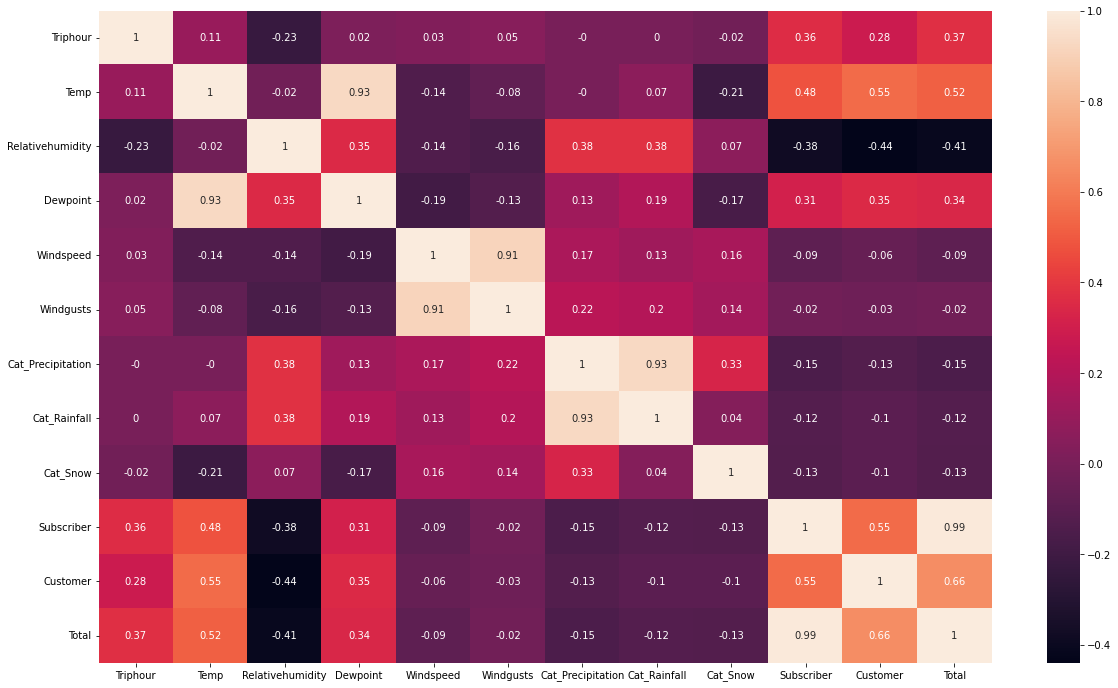

In [ ]:
#Correlation matrix
correlation_matrix=(df.iloc[:,20:]).corr().round(2)
plt.figure(figsize=(20,12)) 
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [ ]:
#Feature  selection
#Windgust and Windspeed are highly correlated. Among the 2 variables , Windspeed shows better correlation with the Target variables. Hence Windspeed is retained and Windgusts is removed from the model
#Temp and Dewpoint are highly correlated. Among the 2 variables , Temp shows better correlation with the Target variables. Hence Temp is retained and Dewpoint is removed from the model

df.drop(['Windgusts','Dewpoint'],axis=1,inplace=True)
df

,Spring,Summer,Winter,Tue,Wed,Thu,Fri,Sat,Sun,Feb,...,Triphour,Temp,Relativehumidity,Windspeed,Cat_Precipitation,Cat_Rainfall,Cat_Snow,Subscriber,Customer,Total
0,0,0,1,0,1,0,0,0,0,0,...,0,-4.0,43,14.1,0.0,0.0,0.0,97,18,115
1,0,0,1,0,1,0,0,0,0,0,...,1,-4.4,45,11.9,0.0,0.0,0.0,178,26,204
2,0,0,1,0,1,0,0,0,0,0,...,2,-4.6,46,10.8,0.0,0.0,0.0,152,9,161
3,0,0,1,0,1,0,0,0,0,0,...,3,-4.7,46,10.9,0.0,0.0,0.0,127,17,144
4,0,0,1,0,1,0,0,0,0,0,...,4,-4.9,47,10.5,0.0,0.0,0.0,59,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,0,0,1,0,1,0,0,0,0,0,...,19,-3.4,51,9.2,0.0,0.0,0.0,271,14,285
8754,0,0,1,0,1,0,0,0,0,0,...,20,-3.7,52,10.2,0.0,0.0,0.0,191,7,198
8755,0,0,1,0,1,0,0,0,0,0,...,21,-3.7,52,10.7,0.0,0.0,0.0,151,8,159
8756,0,0,1,0,1,0,0,0,0,0,...,22,-3.7,51,11.3,0.0,0.0,0.0,127,46,173


In [ ]:
df.to_csv('final_data.csv')